In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
def loadbd(filename):
    bd = []
    time = []
    with open(filename) as f:
        while 1:
            line = f.readline()
            if not line:
                break
            if 'Band' in line:
                line = line.strip('\n').split(' ')
                bd.append(float(line[-2]))
                time.append(float(line[1]))
    bd = np.median(np.array(bd))
    time = np.median(np.array(time))
    return bd,time

In [59]:
arch=['p100','v100','a100']
gsize=['4']
typestr = [
    ['cublas1s','cublas2s','cublas4s','magma_maxcheck','magma_nocheck','magma_fixedbatch'],
    ['cublas1s','cublas2s','magma_maxcheck','magma_nocheck','magma_fixedbatch'],
    ['cublas1s','magma_maxcheck','magma_nocheck','magma_fixedbatch']
]
ylims = [
    [0,1000],
    [0,2000],
    [0,3000]
]

ylims2 = [
    [0,5000],
    [0,3000],
    [0,1500]
]

[781.62, 842.02, 1413.77, 1755.38]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[328.47, 1290.88, 2471.49, 2074.34]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[404.47, 831.59, 1777.69, 1612.05]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


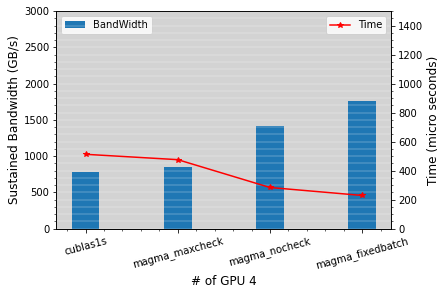

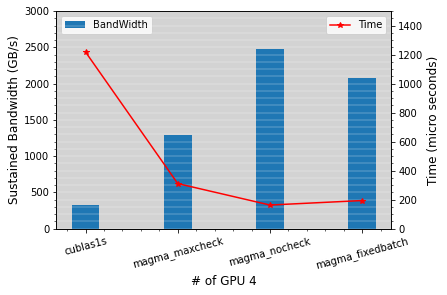

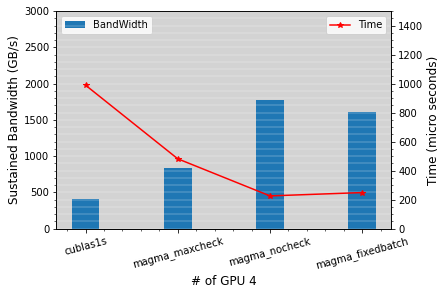

In [60]:
gmap = {'1':0, '2': 1, '4':2}
for a in arch:
    bdlist = []
    timelist = []
    for g in gsize:
        tmptype = typestr[gmap[g]]
        for t in tmptype:        
            filename = 'log_tlrmv/log_{}_{}_{}gpu.log'.format(t,a,g)
            b,time = loadbd(filename)
            bdlist.append(b)
            timelist.append(time)
    print(bdlist)
    typesize = len(tmptype)
    x_pos = [x for x in range(typesize)]
    fig, ax = plt.subplots()
    ax.set_facecolor('lightgrey')
    ax.set_alpha(0.0001)
    for i in range(typesize):
        if i == 0:
            ax.bar(x_pos[i],height=bdlist[i],color='#1f77b4',width=0.3,label='BandWidth')
        else:
            ax.bar(x_pos[i],height=bdlist[i],color='#1f77b4',width=0.3)
#     plt.xlabel("# of GPU {}".format(g),fontsize=12)
    plt.ylabel("Sustained Bandwidth (GB/s)",fontsize=12)
    plt.legend(loc='upper left')
    plt.minorticks_on()
    plt.ylim(ylims[gmap[g]])
    plt.xticks(x_pos,tmptype,rotation=15)
    ax2 = ax.twinx()
    ax2.set_ylabel("Time (micro seconds)",fontsize=12)
    plt.minorticks_on()
    plt.ylim(ylims2[gmap[g]])
    ax2.plot(x_pos, np.array(timelist)*1000000,color='red',marker='*',label='Time')
    plt.legend()
    plt.grid(which='both', color='white', linewidth='0.3')
    plt.savefig("tlrmvplots/bandwidth/Arch{}_GPUnum{}_barplot.eps".format(a,g),bbox_inches='tight')